<a href="https://colab.research.google.com/github/AmashiNiw/EN2550-Assignments/blob/main/A05/180433E_EN2550_a05v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# EN2550 ASSIGNMENT 05
## 180433E

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.0.1 Let’s first import required libraries

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

%matplotlib inline

### 1.0.2 Let’s load and visualize the template image and the convey belt snapshot at a given time

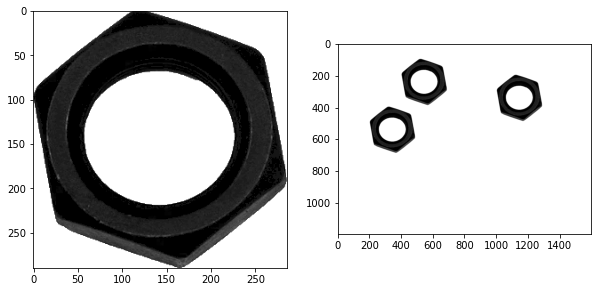

In [20]:
template_im = cv.imread(r'/content/drive/MyDrive/ColabNotebooks/EN2550/template.png', cv.IMREAD_GRAYSCALE)
belt_im = cv.imread(r'/content/drive/MyDrive/ColabNotebooks/EN2550/belt.png', cv.IMREAD_GRAYSCALE)
fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

## **Part I**

### 1.1.1 Otsu’s thresholding

In [21]:
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# fig, ax = plt. subplots(1,2,figsize=(10,10))
# ax[0].imshow(img_t, cmap='gray')
# ax[1].imshow(img_b, cmap='gray')
# plt.show()

### 1.1.2 Morphological closing

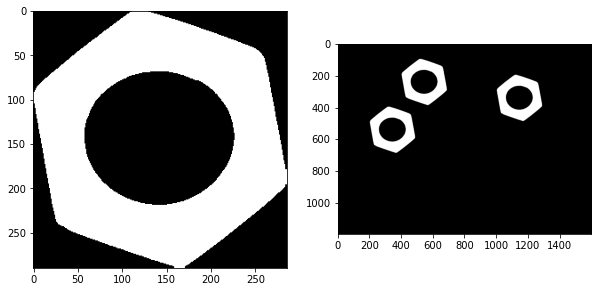

In [22]:
kernel = np.ones((3,3),np.uint8)

closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(closing_t, cmap='gray')
ax[1].imshow(closing_b, cmap='gray')
plt.show()

### 1.1.3 Connected component analysis

In [23]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)

In [24]:
# Printing results of connected component analysis
print('Connected Components Detected in Each Image \n',retval_t,retval_b)

print('\nStatistics in Each Image \n\n In Template \n',stats_t,'\n\n In Belt \n',stats_b,'\n\nEach column corresponds to one of "ConnectedComponentsTypes", which are namely, CC_STAT_LEFT, CC_STAT_TOP, CC_STAT_WIDTH, CC_STAT_HEIGHT and CC_STAT_AREA \n')

print('Centroids in Each Image \n\n In Template \n',centroids_t,'\n\n In Belt \n',centroids_b)

Connected Components Detected in Each Image 
 2 4

Statistics in Each Image 

 In Template 
 [[    0     0   286   290 42290]
 [    0     0   286   290 40650]] 

 In Belt 
 [[      0       0    1600    1200 1798161]
 [    400     100     286     290   40613]
 [   1000     200     286     290   40613]
 [    200     400     286     290   40613]] 

Each column corresponds to one of "ConnectedComponentsTypes", which are namely, CC_STAT_LEFT, CC_STAT_TOP, CC_STAT_WIDTH, CC_STAT_HEIGHT and CC_STAT_AREA 

Centroids in Each Image 

 In Template 
 [[142.18770395 145.19172381]
 [142.82489545 143.780369  ]] 

 In Belt 
 [[ 807.85728475  614.56805258]
 [ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]]


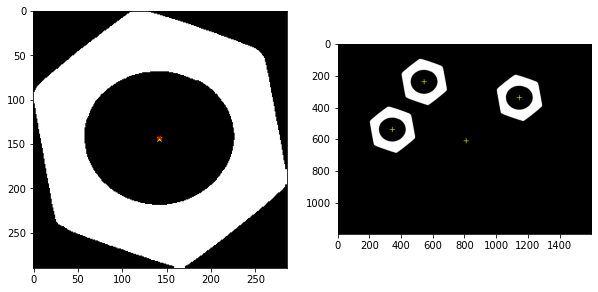

In [25]:
# Drawing the centroids

clr = [(255, 255, 0),(255, 0, 0)] #Two colours to distiguish between centroids in template

cent_t = cv.cvtColor(closing_t,cv.COLOR_GRAY2RGB)
for i in range(retval_t):
  cent_t = cv.drawMarker(cent_t, (int(centroids_t[i][0]),int(centroids_t[i][1])), clr[i], cv.MARKER_TILTED_CROSS, 5,1,cv.LINE_AA)

cent_b = cv.cvtColor(closing_b,cv.COLOR_GRAY2RGB)
for i in range(retval_b):
  cent_b = cv.drawMarker(cent_b, (int(centroids_b[i][0]),int(centroids_b[i][1])), (255, 255, 0), cv.MARKER_CROSS, 30,2,cv.LINE_AA)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(cent_t, cmap='gray')
ax[1].imshow(cent_b, cmap='gray')
plt.show()

### 1.1.4 Contour analysis

With RETR_TREE

In [26]:
# Finding contour list
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

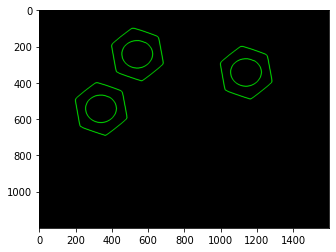

In [27]:
# Drawing contours with a zero bg as the source img
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

With RETR_EXTERNAL

In [28]:
# Finding only outer contours 
contours_t1, hierarchy_t1 = cv.findContours(closing_t, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_b1, hierarchy_b1 = cv.findContours(closing_b, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

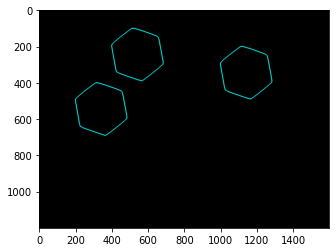

In [29]:
# Drawing the contours
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts1 = cv.drawContours(im_contours_belt, contours_b1, -1, (0,255,255), 3).astype('uint8')
plt.imshow(conts1)

### 1.1.5 Count the number of matching hexagonal nuts inbelt.png.

In [30]:
label = 1 # Remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8') # Omitting the bg

belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # Finding contours of it

for j,c in enumerate(belt_cont): # Iterate through the contour list to match it with the contour of template
  print(cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)) # The lesser the value the more they matches (In practice, take a threshold)

0.00010071698397151607
0.00010071698397928763
0.00010071698397484674


## **Part II**

### 1.2.1 Frame tracking through image moments.

In [31]:
ca = cv.contourArea(contours_b[1]) # All contours
ca1 = cv.contourArea(contours_b1[1]) # Only externaml contours
ca, ca1

(20080.0, 60059.5)

In [32]:
M = cv.moments(contours_b[1])
cx, cy = int(M['m10']/M['m00']) ,  int(M['m01']/M['m00'])
cx, cy # Centroid coord

(341, 542)

In [33]:
# Using this to keep track of objects in a certain frame
count = 1
object_prev_frame = np.array ([cx,cy,ca,count])

In [34]:
delta_x = 15 # Maximum change in cx to track some object across diffrent frames

## **Part III**

### 1.3.1 1. Implement the function get_indexed_image, which takes an image as the input, performs thresholding, closing, and connected component analysis and return retval, labels, stats, centroids.


In [35]:
def get_indexed_image(im):
  """ Thresholding, closing, and connected component analysis lumped
  """

  th, img = cv.threshold(im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

  kernel = np.ones((3,3),np.int8)
  closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

  retval, labels, stats, centroids = cv.connectedComponentsWithStats(closing)

  return retval, labels, stats, centroids

### 1.3.2 2. Implement the function is_new, which checks the dissimilarity between 2 vectors.


In [36]:
def is_new(a, b, delta, i):
  """ Vector Dissimilarity with an Array of Vectors
  Checks if vector b is similar to a one or more vectors in a outside the tolerances specified in delta.
  vector i specifies which elements in b to compare with those in a.
  """
  'Check whether the absolute different between all the elements of ith column of each array is greater than the ith delta value'
  
  return np.all(np.absolute(a[:,i]-b[i])>delta)


In [37]:
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])

b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])

delta = np.array([delta_x])
i = np.array([0])

assert is_new(a, b, delta, i) == False, " Check the function "

### 1.3.3 3. If the array a is in the shape of (number of nuts , len(object_prev_frame)) ( i.e. array a is made by stacking all the object_prev_frame for each frame. If b is in the form of [cx, cy, ca, count], write the function prev_index to find the index of a particular nut in the previous frame

In [38]:
def prev_index(a, b, delta, i):
  """ Returns Previous Index
  Returns the index of the apppearance of the object in the previous frame.
  (See thee example in the next cell)
  """
  return (np.asarray(np.absolute(a[:,i] - b[i]) <= delta).nonzero())[0]

In [39]:
 # check prev_index expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])

b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])

delta = np.array([delta_x])
i = np.array([0])

assert prev_index(a,b,delta,i) == 1, " Check the function "

### 1.4 Implement a code to detect hexagonal nuts in a moving convey belt.


#### Defining the necessary functions

In [40]:
def get_greys(video_name):
  """  Access each frame, convert them into greyscale and store them in greys """

  greys = []
  cap = cv.VideoCapture(video_name) # give the correct path here
  while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
      print("Can't receive frame (stream end?). Exiting ...")
      return greys

    grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) # Converting to greyscale
    greys.append(grey)
    
    if cv.waitKey(1) == ord('q'):
      return greys

  cap.release()
  #cv.destroyAllWindows()

In [41]:
def draw_contours(greys):
    """ A function that can be used to draw external contours given a set of greyscale frames """

    contours = []
    for i,grey in enumerate(greys):

        retval, labels, stats, centroids = get_indexed_image(grey)
        contours_f, hierarchy_f = cv.findContours(((labels>=1)*255).astype('uint8'), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

        im_contours_belt = np.zeros((grey.shape[0],grey.shape[1],3), np.uint8)
        cont = cv.drawContours(im_contours_belt, contours_f, -1, (255,255,0), 3).astype('uint8')

        if not(i%28): contours.append(cont)
    return contours

In [42]:
def get_all_frames(greys):
    """ For each frame, finds the contour features of objects that match the 
    template (previously obtained) and obtaines b's, which then are stacked to 
    obtain a's which has info about every matching object in a certain frame"""
    
    all_object_frames = []

    matching_threshold = 4.5e-3

    for grey in greys:
        retval, labels, stats, centroids = get_indexed_image(grey)

        grey_wo_bg=((labels>=1)*255).astype('uint8')
        contours_f, hierarchy_f = cv.findContours(grey_wo_bg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

        a = []
        for j,c in enumerate(contours_f):
            if cv.matchShapes(contours_t1[0], c, cv.CONTOURS_MATCH_I1, 0.0) > matching_threshold:
                continue
            ca = cv.contourArea(contours_f[j])
            M = cv.moments(contours_f[j])
            cx, cy = int(M['m10']/M['m00']) ,  int(M['m01']/M['m00'])
            b = np.array ([cx,cy,ca,j+1])
            a.append(b)
        all_object_frames.append(np.array(a))
    return all_object_frames

In [43]:
def count_objects(all_object_frames):
    """ Counts unique objects across frames 
    Due to its initialization if multiple objects are present in the initial frames, 
    their assigned order might change"""

    object_prev_frame = all_object_frames[0] #initialize
    object_count = object_prev_frame.shape[0]

    for a in all_object_frames: # choose a frame
        for b in a: # a particular object with c_area, cx, cy and count
            if is_new(object_prev_frame,b,delta_x,0):
                object_count+=1
                b[3] = object_count # If it's a new object assign the new count
            else:
                b[3] = object_prev_frame[prev_index(object_prev_frame,b,delta_x,0)][0,3] 
                # If not, find its index in the previous frame and assign it
        object_prev_frame = a
    return object_count

In [44]:
def annotate_objects(greys,all_object_frames):    
    """ Annotate objects in each frame according to the updated object count """

    annotated = []
    for i in range(len(greys)):
        frame = cv.cvtColor(greys[i], cv.COLOR_BGR2RGB) # we can also store and use the original frames here
        for object in all_object_frames[i]:
            frame = cv.putText(frame, str(int(object[3])), (int(object[0]), int(object[1])),cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 2, (255,0,0), 2)
        greys[i] = frame # Replace greys with annotated frames
        if not(i%28): annotated.append(frame)
    return annotated

In [45]:
# Canvas I used to apply my index number and assignment info to the final video
canvas = np.zeros((1920,1920,3),np.uint8)
canvas[:,:,0:2]=255
canvas = cv.putText(canvas, '180433E', (50, 210),cv.FONT_HERSHEY_SIMPLEX, 4, (0,0,0), 5)
canvas = cv.putText(canvas, 'EN2550 Assignment 05', (60, 330),cv.FONT_HERSHEY_SIMPLEX, 4, (0,0,0), 5)

In [46]:
def write_to_video(file_name,frames):
    """ Provided the annotated frames creates a mp4 file with the given name"""    
    fourcc = cv.VideoWriter_fourcc(*'MP4V')
    out = cv.VideoWriter(file_name, fourcc, 30.0, (1920, 1920), True)
    for frame in frames:
        #canvas[420:1500,:] = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        canvas[420:1500,:] = frame
        out.write(canvas)

    out.release()
    return

#### TWO FRAMES

In [47]:
greys = get_greys('/content/drive/MyDrive/ColabNotebooks/EN2550/conveyor_two_frame.mp4')
contours_two = draw_contours(greys)
all_object_frames = get_all_frames(greys)
object_count = count_objects(all_object_frames)
annotated_two = annotate_objects(greys,all_object_frames)
write_to_video('conveyor_two.mp4',greys)

Can't receive frame (stream end?). Exiting ...


#### WITH ROTATION

In [48]:
greys = get_greys('/content/drive/MyDrive/ColabNotebooks/EN2550/conveyor_with_rotation.mp4')
contours_rot = draw_contours(greys)
all_object_frames = get_all_frames(greys)
object_count = count_objects(all_object_frames)
annotated_rot = annotate_objects(greys,all_object_frames)
write_to_video('conveyor_rot.mp4',greys)

Can't receive frame (stream end?). Exiting ...


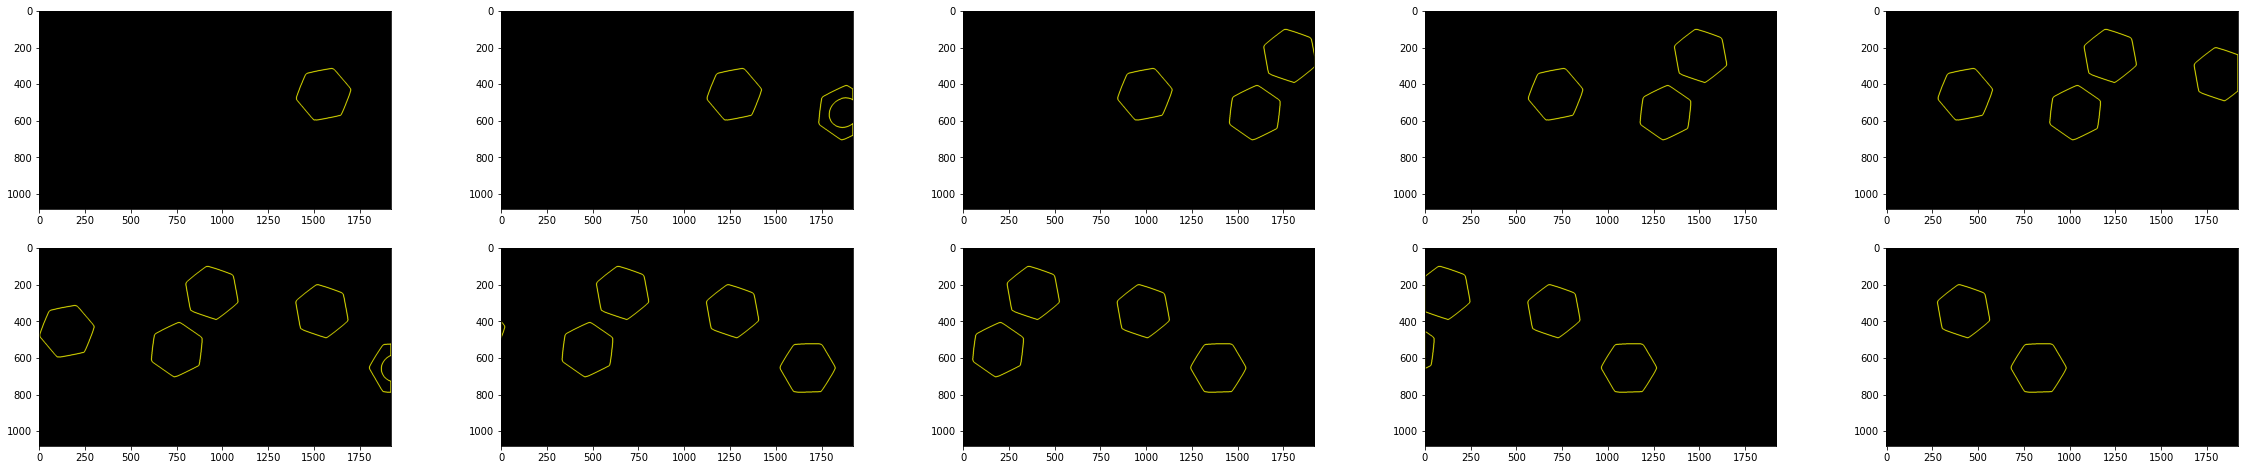

In [49]:
# Plotting some of the contour drawn frames
fig, ax = plt. subplots(2,5,figsize=(40,8))

for i in range(len(contours_rot)):
    ax[i//5][i%5].imshow(contours_rot[i], cmap='gray')
plt.show()

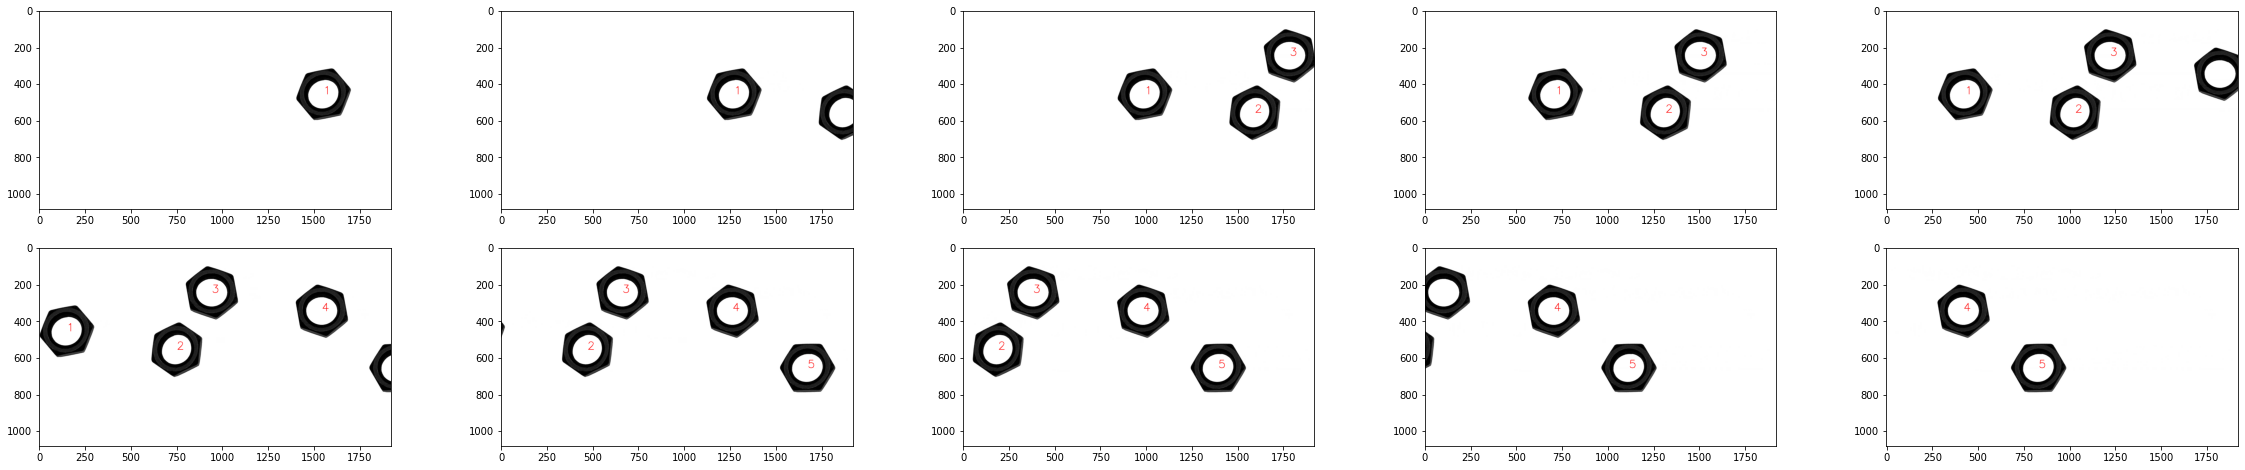

In [50]:
# Plotting some of the annotated frames
fig, ax = plt. subplots(2,5,figsize=(40,8))

for i in range(len(annotated_rot)):
    ax[i//5][i%5].imshow(annotated_rot[i], cmap='gray')
plt.show()